## Лабораторна 2

### Завдання 1

<p>Зчитати датасет ВВП за країнами з Вікіпедії</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]

<p>1. Вивести перші 5 рядків</p>

In [3]:
df.head(5)

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

<p>2. Визначити розмір датасета</p>

In [4]:
df.shape

(210, 7)

<p>3. Визначити кількість стовпців</p>

In [5]:
len(df.columns)

7

<p>4. Змінити назви стовпців на більш зручні</p>

In [6]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [7]:
normal_columns = [
    ('Country'),
    ('IMF_Forecast'),
    ('IMF_Year'),
    ('World_Bank_Estimate'), 
    ('World_Bank_Year'),
    ('United_Nations_Estimate'),
    ('United_Nations_Year')]

df.columns = normal_columns

In [8]:
df.head()

,Country,IMF_Forecast,IMF_Year,World_Bank_Estimate,World_Bank_Year,United_Nations_Estimate,United_Nations_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


<p>5. Визначити тип даних</p>

In [9]:
df.dtypes

Country                    object
IMF_Forecast               object
IMF_Year                   object
World_Bank_Estimate        object
World_Bank_Year            object
United_Nations_Estimate    object
United_Nations_Year        object
dtype: object

<p>Прибираємо посилання на джерела всередині датафрейма</p>

In [10]:
df = df.replace(to_replace=r'\[.*?\]', value='', regex=True)
df.head()

,Country,IMF_Forecast,IMF_Year,World_Bank_Estimate,World_Bank_Year,United_Nations_Estimate,United_Nations_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,2024,17794782,2023,17963170,2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


<p>Знаходимо унікальні значення стовпців, для того щоб потім почистити датафрейм та залишити в ньому дані тільки за певні відомі роки</p>

In [11]:
print(df['IMF_Year'].unique())
print(df['World_Bank_Year'].unique())
print(df['United_Nations_Year'].unique())

['2024' '2023' '—' '2022']
['2023' '—' '2022' '2021']
['2022' '—']


In [12]:
df = df.drop(df[df['IMF_Year'].isin(['2022', '2023', '—'])].index)
df = df.drop(df[df['World_Bank_Year'].isin(['2022', '2021', '—'])].index)
df = df.drop(df[df['United_Nations_Year'].isin(['—'])].index)

In [13]:
print(df['IMF_Year'].unique())
print(df['World_Bank_Year'].unique())
print(df['United_Nations_Year'].unique())

['2024']
['2023']
['2022']


<p>Тепер ми маємо в датасеті стовпці дані тільки за певними роками в одному стовпці</p>

<p>6. Замініть у таблиці значення "—" на значення NaN. Перевірити 
наявність пропущених значень. При наявності, замінити пропущені 
значення на середнє значення.  </p>

In [14]:
df.replace("—", np.nan, inplace=True)

In [15]:
df.isnull().sum()

Country                    0
IMF_Forecast               0
IMF_Year                   0
World_Bank_Estimate        0
World_Bank_Year            0
United_Nations_Estimate    0
United_Nations_Year        0
dtype: int64

In [16]:
columns_to_convert = df.columns.drop('Country')
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df[columns_to_convert] = df[columns_to_convert].fillna(df[columns_to_convert].mean())
df[columns_to_convert] = df[columns_to_convert].astype(int)

<p>7. Ще раз перевірити наявність пропущених значень.</p>

In [17]:
df.isnull().sum()

Country                    0
IMF_Forecast               0
IMF_Year                   0
World_Bank_Estimate        0
World_Bank_Year            0
United_Nations_Estimate    0
United_Nations_Year        0
dtype: int64

In [18]:
df.dtypes

Country                    object
IMF_Forecast                int32
IMF_Year                    int32
World_Bank_Estimate         int32
World_Bank_Year             int32
United_Nations_Estimate     int32
United_Nations_Year         int32
dtype: object

<p>8. Перевірити наявність дублікатів. При наявності видалити дублікати</p>

In [19]:
df.duplicated().sum()

0

<p>Дублікатів не виявлено</p>

<p>9. Вивести описову статистику датасету describe()</p>

In [20]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,IMF_Forecast,IMF_Year,World_Bank_Estimate,World_Bank_Year,United_Nations_Estimate,United_Nations_Year
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,1207480.72,2024.00,1159462.52,2023.00,1109818.12,2022.00
std,8531494.42,0.00,8206001.55,0.00,7851453.47,0.00
min,66.00,2024.00,62.00,2023.00,59.00,2022.00
25%,13675.50,2024.00,14060.00,2023.00,12824.50,2022.00
50%,51269.50,2024.00,48238.00,2023.00,44174.50,2022.00
75%,312511.25,2024.00,332026.75,2023.00,293066.75,2022.00
max,109529216.00,2024.00,105435540.00,2023.00,100834796.00,2022.00


<p>10.  Визначте відхилення (різницю) між показниками MVF_2024 та 
WorldBank_2023 для кожної країни. У яких країнах ці показники 
найбільше відрізняються (дати відповьдт)? </p>

In [21]:
df['Difference'] = df['World_Bank_Estimate'] - df['United_Nations_Estimate']
df = df[df['Country'] != 'World']

In [22]:
max_diff_index = df['Difference'].abs().idxmax()
max_country = df.loc[max_diff_index, 'Country']
max_difference = df.loc[max_diff_index, 'Difference']
print(f"Country: {max_country}")
print(f"Difference: {max_difference:.2f}")

Country: United States
Difference: 1616835.00


<p>Країна з найбільшою різницею - США</p>

<p>11.  Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та 
OON_2022. Які пари змінних мають найвищу кореляцію?</p>

<p>Для визначення кореляції використаємо метод Кендала, бо при інших методах кореляції = 1</p>

In [23]:
correlation = df[['IMF_Forecast', 'World_Bank_Estimate', 'United_Nations_Estimate']].corr(method='kendall')
correlation

,IMF_Forecast,World_Bank_Estimate,United_Nations_Estimate
IMF_Forecast,1.00,0.98,0.96
World_Bank_Estimate,0.98,1.00,0.97
United_Nations_Estimate,0.96,0.97,1.00


<p>Пара з найбільшою кореляцією = IMF_Forecast та World_Bank_Estimate</p>

<p>12.  Обчисліть середнє значення для кожного стовпця (MVF_2024, 
WorldBank_2023, OON_2022). Як це середнє значення змінюється між 
роками?</p>

In [24]:
df[['IMF_Forecast' , 'World_Bank_Estimate', 'United_Nations_Estimate']].mean()

IMF_Forecast              602331.36
World_Bank_Estimate       576914.60
United_Nations_Estimate   552695.34
dtype: float64

<p>З роками середнє значення росте</p>

<p>13.  Обчисліть стандартне відхилення показників для кожної країни. Яка 
країна має найвищу варіативність у показниках між роками? </p>

In [25]:
df['st_dev'] = df[['IMF_Forecast' , 'World_Bank_Estimate', 'United_Nations_Estimate']].std(axis=1)
result = df.sort_values('st_dev', ascending=False)[['Country', 'st_dev']]
result.head()

,Country,st_dev
1,United States,1519552.65
2,China,386666.68
12,Mexico,278275.87
3,Germany,266573.60
5,India,251410.63


<p>Найвищу варіативність у показниках між роками має США</p>

<p>14.  Визначення країни з найвищим та найнижчим показниками: Знайдіть 
країну з найвищим та найнижчим показниками у кожному з років 
(MVF_2024, WorldBank_2023, OON_2022).</p>

In [26]:
columns = ['IMF_Forecast', 'World_Bank_Estimate', 'United_Nations_Estimate']
df = df[df['Country'] != 'World']
for col in columns:
    if col!='World':
        max_country = df.loc[df[col].idxmax()]
        min_country = df.loc[df[col].idxmin()]
        
        print(f"\nДля {col}:")
        print(f"Найвищий показник: {max_country['Country']} ({max_country[col]:.2f})")
        print(f"Найнижчий показник: {min_country['Country']} ({min_country[col]:.2f})")


Для IMF_Forecast:
Найвищий показник: United States (28781083.00)
Найнижчий показник: Tuvalu (66.00)

Для World_Bank_Estimate:
Найвищий показник: United States (27360935.00)
Найнижчий показник: Tuvalu (62.00)

Для United_Nations_Estimate:
Найвищий показник: United States (25744100.00)
Найнижчий показник: Tuvalu (59.00)


<p>15.  Побудуйте гістограму для розподілу показників MVF_2024 серед всіх 
країн. Який вигляд має розподіл? Чи є країни, що виділяються?</p>

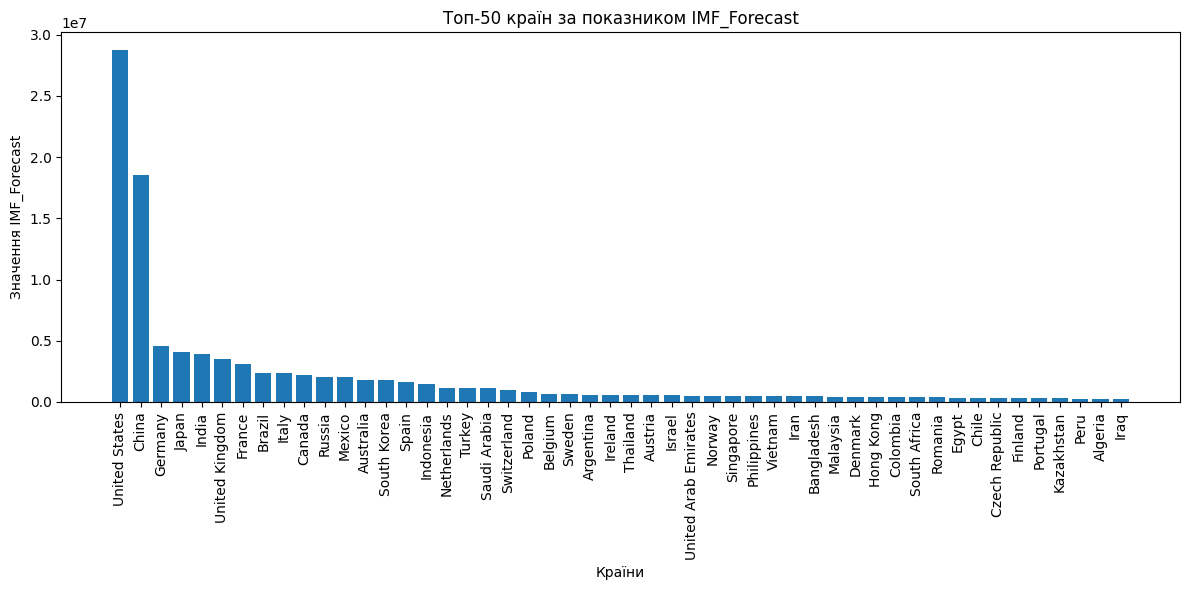

In [27]:
sorted_data = df.sort_values('IMF_Forecast', ascending=False)
top_50 = sorted_data.head(50)

plt.figure(figsize=(12, 6))
plt.bar(top_50['Country'], top_50['IMF_Forecast'])
plt.title('Топ-50 країн за показником IMF_Forecast')
plt.xlabel('Країни')
plt.ylabel('Значення IMF_Forecast')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

<p>Дві країни, що значно виділяються - United States та China</p>

<p>16.  Розрахуйте частку кожної країни в загальному значенні для кожного 
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки 
країн з часом (дати відповідь)? </p>

In [28]:
total_2024 = df['IMF_Forecast'].sum()
total_2023 = df['World_Bank_Estimate'].sum()
total_2022 = df['United_Nations_Estimate'].sum()

In [29]:
df['Share_2024'] = df['IMF_Forecast'] / total_2024 * 100
df['Share_2023'] = df['World_Bank_Estimate'] / total_2023 * 100
df['Share_2022'] = df['United_Nations_Estimate'] / total_2022 * 100

df_sorted = df.sort_values('Share_2024', ascending=False)

In [30]:
df_sorted['Change_2023_2024'] = df_sorted['Share_2024'] - df_sorted['Share_2023']
df_sorted['Change_2022_2023'] = df_sorted['Share_2023'] - df_sorted['Share_2022']

In [31]:
print("\nКраїни з найбільшим зростанням частки (2023-2024):")
print(df_sorted.nlargest(5, 'Change_2023_2024')[['Country', 'Change_2023_2024']])

print("\nКраїни з найбільшим падінням частки (2023-2024):")
print(df_sorted.nsmallest(5, 'Change_2023_2024')[['Country', 'Change_2023_2024']])


Країни з найбільшим зростанням частки (2023-2024):
          Country  Change_2023_2024
5           India              0.21
1   United States              0.20
12         Mexico              0.14
8          Brazil              0.06
35           Iran              0.04

Країни з найбільшим падінням частки (2023-2024):
       Country  Change_2023_2024
4        Japan             -0.27
54     Nigeria             -0.12
115      Sudan             -0.08
43       Egypt             -0.06
25   Argentina             -0.06


In [32]:
print("\nКраїни з найбільшим зростанням частки (2022-2023):")
print(df_sorted.nlargest(5, 'Change_2022_2023')[['Country', 'Change_2022_2023']])

print("\nКраїни з найбільшим падінням частки (2022-2023):")
print(df_sorted.nsmallest(5, 'Change_2022_2023')[['Country', 'Change_2022_2023']])


Країни з найбільшим зростанням частки (2022-2023):
          Country  Change_2022_2023
1   United States              0.47
12         Mexico              0.25
3         Germany              0.19
8          Brazil              0.16
18         Turkey              0.16

Країни з найбільшим падінням частки (2022-2023):
      Country  Change_2022_2023
2       China             -0.93
11     Russia             -0.31
4       Japan             -0.20
54    Nigeria             -0.13
13  Australia             -0.13


<p>17.  Візуалізуйте зміни в показниках для кожної країни за три роки на 
графіку. Які країни показують стабільне зростання або спад (дати 
відповідь)? </p>

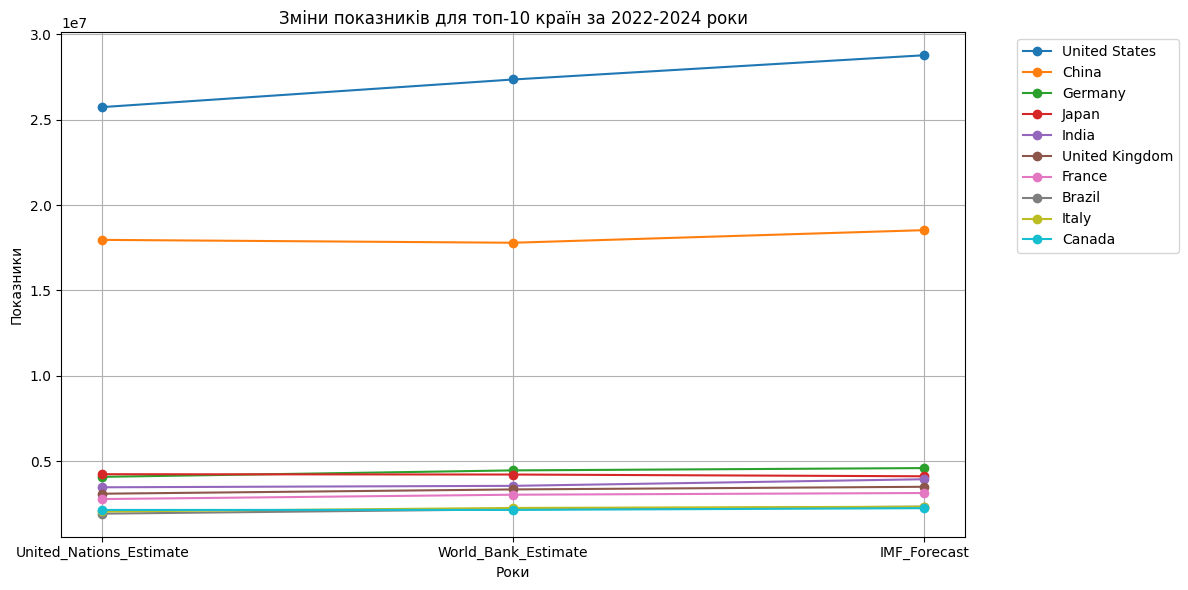

In [33]:
top_10_countries = df.nlargest(10, 'IMF_Forecast')['Country'].tolist()

# Створюємо графік
plt.figure(figsize=(12, 6))

for country in top_10_countries:
    country_data = df[df['Country'] == country]
    plt.plot(['United_Nations_Estimate', 'World_Bank_Estimate', 'IMF_Forecast'], 
             country_data[['United_Nations_Estimate', 'World_Bank_Estimate', 'IMF_Forecast']].values[0],
             marker='o', label=country)

plt.title('Зміни показників для топ-10 країн за 2022-2024 роки')
plt.xlabel('Роки')
plt.ylabel('Показники')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

<p>Найбільші зміни спостерігаються у США та Китаї, де за три роки тенденція виросла</p>

<p>Висновки по Завданню 1:
<ul>
    <li>було проаналізовано датасет ВВП країн за 2022-2024 роки</li>
    <li>освоєно навички підготовки датасету для аналізу</li>
    <li>між показниками MVF_2024 та WorldBank_2023 найбільша різниця у United States</li>
    <li>найбільші показники за всі три роки у United States, найменші показники - у Tuvalu</li>
    <li>топ 5 країн з найбільшими показниками за три роки формують - United States, China, Germany, Japan, India, United Kingdom</li>
</ul>
</p>

<p></p>

<p></p>

### Завдання 2

<p>Завантажити датасет Титанік з Kaggle (або 
використовуйте вже завантажений файл titanic.csv) </p>

<p>1. Вивести перших 5 рядків.</p>

In [34]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


<p>2. Визначити розмір датасета</p>

In [35]:
data.shape

(418, 12)

<p>3. Визначити тип даних</p>

In [36]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<p>4. Визначити наявність пропущених значень. При наявності, замінити 
пропущені значення на середнє значення</p>>

In [37]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<p>Так як стовпець Cabin не відграє значну роль у проведенні аналізу та містить велику к-сть пропущених значень, можна його видалити</p>

In [38]:
data = data.drop('Cabin', axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,S


<p>5. Ще раз перевірити наявність пропущених значень</p>

In [39]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
data.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_12128\2946364956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12128\2946364956.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<p>6. Перевірити наявність дублікатів. При наявності видалити дублікати </p>

In [40]:
data.duplicated().sum()

0

<p>Дублікатів не виявлено</p>

<p>7. Вивести описову статистику датасету describe()</p>

In [41]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,418.00,418.00,418.00,418.00,418.00
mean,1100.50,0.36,2.27,30.27,0.45,0.39,35.63
std,120.81,0.48,0.84,12.63,0.90,0.98,55.84
min,892.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,0.00,1.00,23.00,0.00,0.00,7.90
50%,1100.50,0.00,3.00,30.27,0.00,0.00,14.45
75%,1204.75,1.00,3.00,35.75,1.00,0.00,31.50
max,1309.00,1.00,3.00,76.00,8.00,9.00,512.33


<p>8. Видалити стовпчик Cabin </p>

<p>Стовпець видалено вище</p>

<p>9. Сформувати датасет з обраними стовпцями: 
['Survived', 'Pclass', 'Sex', 'Age', 'Fare']] </p>

In [42]:
dataset = data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
dataset.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.50,7.83
1,1,3,female,47.00,7.00
2,0,2,male,62.00,9.69
3,0,3,male,27.00,8.66
4,1,3,female,22.00,12.29


<p> 10. Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні 
значення даного стовпчика).</p>

In [43]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [44]:
pd.set_option('future.no_silent_downcasting', True)
dataset = dataset.replace({'Sex': {'male': 0, 'female': 1}})

In [45]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.50,7.83
1,1,3,1,47.00,7.00
2,0,2,0,62.00,9.69
3,0,3,0,27.00,8.66
4,1,3,1,22.00,12.29


<p>11. Ще раз перевірити кількість пропущених даних (впевнитись, що їх 
немає)</p>

In [46]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

<p>12.  Вивести 5 перших рядків датасету.  </p>

In [47]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.50,7.83
1,1,3,1,47.00,7.00
2,0,2,0,62.00,9.69
3,0,3,0,27.00,8.66
4,1,3,1,22.00,12.29


<p>13. Вивести 5 останніх рядків датасету.</p>

In [48]:
dataset.tail()

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27,8.05
414,1,1,1,39.00,108.90
415,0,3,0,38.50,7.25
416,0,3,0,30.27,8.05
417,0,3,0,30.27,22.36


<p>14.  Аналіз виживання залежно від статі: Обчисліть відсоток виживання 
для кожної статі. Чи була різниця у виживанні між чоловіками та 
жінками?</p>

In [49]:
total = dataset[dataset['Survived']==1]['Survived'].count()
print('Загальна к-сть виживших: ', total)

Загальна к-сть виживших:  152


In [50]:
female_survived = dataset[(dataset['Sex'] == 1) & (dataset['Survived'] == 1)]['Sex'].count()
female_survived

152

In [51]:
male_survived = dataset[(dataset['Sex'] == 0) & (dataset['Survived'] == 1)]['Sex'].count()
print(male_survived)

0


In [52]:
mshare = (male_survived/total)*100
print('Відсоток виживших чоловіків:', mshare)

Відсоток виживших чоловіків: 0.0


In [53]:
fshare = (female_survived/total)*100
print('Відсоток виживших жінок:', fshare)

Відсоток виживших жінок: 100.0


<p>З даного набору даних вижившими залишились тільки жінки</p> 

<p>15. Обчисліть відсоток виживання для кожного класу (Pclass). Який 
клас мав найвищий рівень виживання (дати відповідь)?</p>

In [54]:
dataset['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [55]:
survival_rates = dataset.groupby('Pclass')['Survived'].mean() * 100
survival_rates

Pclass
1   46.73
2   32.26
3   33.03
Name: Survived, dtype: float64

<p>Перший клас мав найвищий відсоток виживання</p>

<p>16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи 
впливає вік на виживання (дати відповідь)? </p>

In [56]:
survived = dataset[dataset['Survived']==1]
died = dataset[dataset['Survived']==0]

In [57]:
print('Середній вік виживших: ', survived['Age'].mean())

Середній вік виживших:  30.27239973050095


In [58]:
print('Середній вік невиживших: ', died['Age'].mean())

Середній вік невиживших:  30.272699293414263


<p>Середній вік між вижившими та невижившими майже не відрізняється. Тож вік ні на що не впливає</p>

<p>17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і 
обчисліть рівень виживання для кожної групи. Як тариф впливав на 
шанси виживання (дати відповідь)?</p>

In [59]:
dataset['FareGroup'] = pd.qcut(dataset['Fare'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

survival_rates = dataset.groupby('FareGroup')['Survived'].mean() * 100

print("Рівень виживання для кожної групи тарифів:")
print(survival_rates)

highest_survival_group = survival_rates.idxmax()
highest_survival_rate = survival_rates.max()

print(f"\nГрупа з найвищим рівнем виживання: {highest_survival_group}")
print(f"Відсоток виживання: {highest_survival_rate:.2f}%")

Рівень виживання для кожної групи тарифів:
FareGroup
Low           26.32
Medium-Low    27.08
Medium-High   39.05
High          53.40
Name: Survived, dtype: float64

Група з найвищим рівнем виживання: High
Відсоток виживання: 53.40%


C:\Users\User\AppData\Local\Temp\ipykernel_12128\2863164899.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = dataset.groupby('FareGroup')['Survived'].mean() * 100


<p>18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного 
класу (Pclass). Чи існує значна різниця у тарифах між класами (дати 
відповідь)? </p>

In [60]:
average_fares = dataset.groupby('Pclass')['Fare'].mean()
print("Середній тариф для кожного класу:")
print(average_fares)

fare_difference = average_fares.max() - average_fares.min()

print(f"\nРізниця між найвищим і найнижчим середнім тарифом: {fare_difference:.2f}")

Середній тариф для кожного класу:
Pclass
1   94.28
2   22.20
3   12.57
Name: Fare, dtype: float64

Різниця між найвищим і найнижчим середнім тарифом: 81.71


<p>19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік 
пасажирів розподіляється за класами (дати відповідь)? </p>

In [61]:
average_age = dataset.groupby('Pclass')['Age'].mean()

print("Середній вік пасажирів для кожного класу:")
print(average_age)
median_age = dataset.groupby('Pclass')['Age'].median()

print("\nМедіана віку пасажирів для кожного класу:")
print(median_age)

Середній вік пасажирів для кожного класу:
Pclass
1   40.02
2   28.86
3   26.09
Name: Age, dtype: float64

Медіана віку пасажирів для кожного класу:
Pclass
1   39.00
2   28.00
3   29.50
Name: Age, dtype: float64


<p> 20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто 
не вижив. Чи є видимі відмінності у вікових групах (дати 
відповідь)? </p>

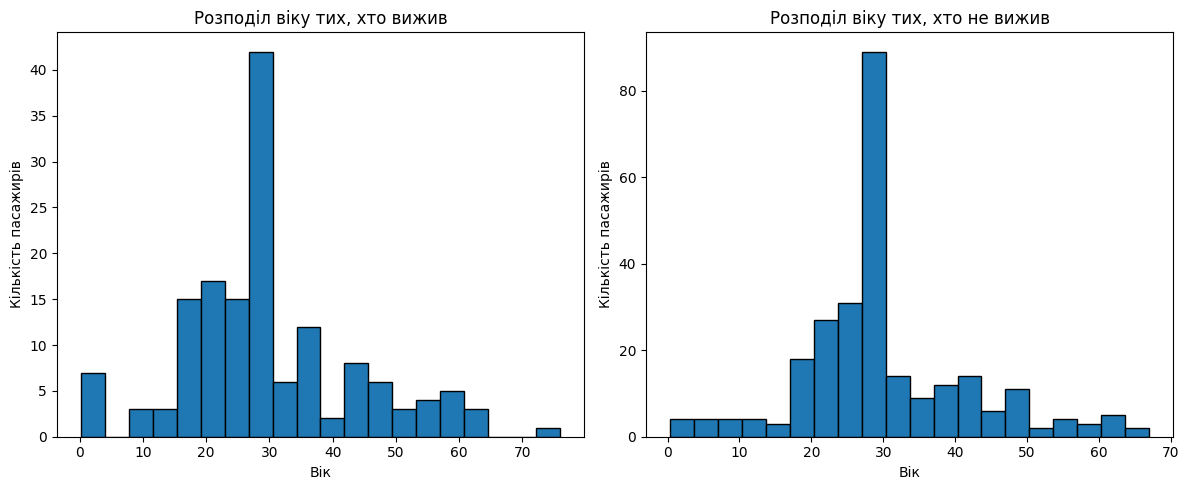

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(dataset[dataset['Survived'] == 1]['Age'], bins=20, edgecolor='black')
ax1.set_title('Розподіл віку тих, хто вижив')
ax1.set_xlabel('Вік')
ax1.set_ylabel('Кількість пасажирів')

ax2.hist(dataset[dataset['Survived'] == 0]['Age'], bins=20, edgecolor='black')
ax2.set_title('Розподіл віку тих, хто не вижив')
ax2.set_xlabel('Вік')
ax2.set_ylabel('Кількість пасажирів')

plt.tight_layout()
plt.show()

<p>Найбільша кількість людей серед виживших належить до категорії віком від 20-30. Серед загиблих - також від 20-30.</p>

<p>21. Обчисліть відсоток виживання для кожної комбінації статі та класу 
(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група 
мала найвищий рівень виживання (дати відповідь)?</p>

In [63]:
survival_rates = dataset.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

print("Відсоток виживання для кожної комбінації статі та класу:")
print(survival_rates)

highest_survival_group = survival_rates.idxmax()
highest_survival_rate = survival_rates.max()

Відсоток виживання для кожної комбінації статі та класу:
Sex  Pclass
0    1          0.00
     2          0.00
     3          0.00
1    1        100.00
     2        100.00
     3        100.00
Name: Survived, dtype: float64


<p>Для чоловіків у всіх класах (1, 2, 3) відсоток виживання 0%. Для жінок у всіх класах (1, 2, 3) відсоток виживання 100%</p>

<p>22.  Обчисліть кореляцію між усіма числовими змінними (Survived, 
Pclass, Age, Fare). Які змінні найбільш сильно корелюють з 
виживанням (дати відповідь)?</p>

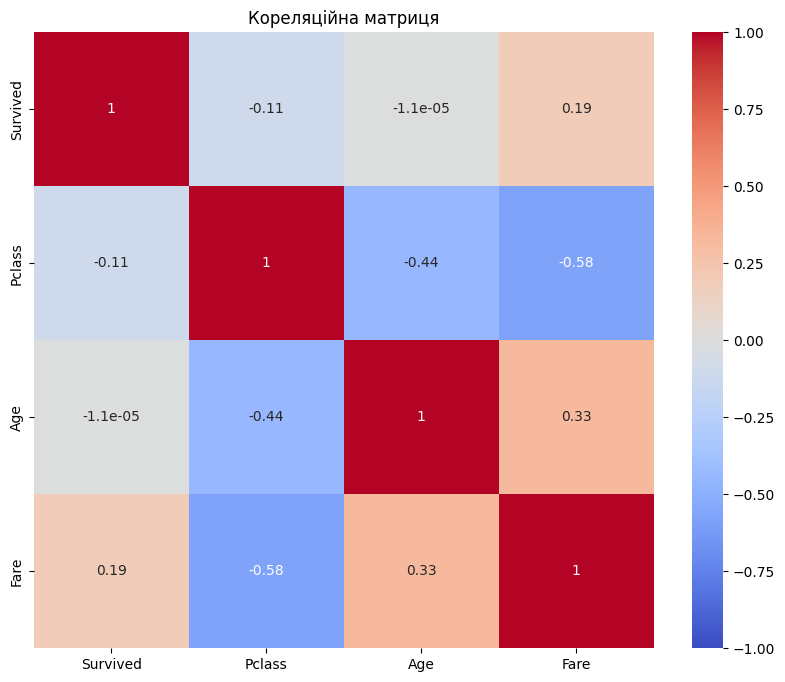

Кореляції з виживанням:
Survived    1.00
Fare        0.19
Age        -0.00
Pclass     -0.11
Name: Survived, dtype: float64


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dataset[['Survived', 'Pclass', 'Age', 'Fare']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Кореляційна матриця')
plt.show()

survival_correlations = correlation_matrix['Survived'].sort_values(ascending=False)
print("Кореляції з виживанням:")
print(survival_correlations)

<p>Тариф - має найсильнішу позитивну кореляцію з виживанням. Класс - має слабку негативну кореляцію з виживанням. Вік - практично відсутня кореляція з виживанням.</p>

<p>Висновки:
<ul>
<li>було проаналізовано датасет Титанік з 418 рядками та 12 стовпців</li>
<li>з даного датасету 100% виживших були жінки</li>
<li>найбільша к-сть виживших належить до 1-го класу</li>
<li>найбільша к-сть виживших віком від 20 до 30 років</li>
    <li>найсильніша позитивна кореляція виживання - з тарифом </li>
</ul>
</p>